In [88]:
#import packages
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pylab as plt
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [89]:
local_zip = 'C:/Users/ac7413/Downloads/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:/Users/ac7413/Downloads/horse-or-human')
local_zip = 'C:/Users/ac7413/Downloads/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:/Users/ac7413/Downloads/validation-horse-or-human')
zip_ref.close()

In [90]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('C:/Users/ac7413/Downloads/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('C:/Users/ac7413/Downloads/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('C:/Users/ac7413/Downloads/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('C:/Users/ac7413/Downloads/validation-horse-or-human/humans')

In [91]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [92]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [93]:

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'C:/Users/ac7413/Downloads/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'C:/Users/ac7413/Downloads/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [94]:
IMG_SHAPE = (300, 300, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

c:\users\ac7413\appdata\local\programs\python\python37\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 2s 0us/step


In [96]:
average_pool = tf.keras.Sequential()
average_pool.add(layers.AveragePooling2D())
average_pool.add(layers.Flatten())
average_pool.add(layers.Dense(1, activation='sigmoid'))

In [98]:
standard_model = tf.keras.Sequential([base_model, 
    average_pool])

In [99]:
standard_model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='binary_crossentropy',
              metrics=['accuracy'])

In [100]:
import PIL

history = standard_model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=5,
      verbose=1,
      validation_data = validation_generator, validation_steps = 10)

Epoch 1/5
8/8 [==============================] - 1327s 166s/step - loss: 0.1634 - accuracy: 0.8988 - val_loss: 0.9164 - val_accuracy: 0.8813
Epoch 2/5
8/8 [==============================] - 1277s 160s/step - loss: 1.5798e-04 - accuracy: 1.0000 - val_loss: 0.8898 - val_accuracy: 0.8969
Epoch 3/5
8/8 [==============================] - 1213s 152s/step - loss: 3.8182e-04 - accuracy: 1.0000 - val_loss: 0.7283 - val_accuracy: 0.9234
Epoch 4/5
8/8 [==============================] - 867s 108s/step - loss: 2.3172e-05 - accuracy: 1.0000 - val_loss: 0.7455 - val_accuracy: 0.9266
Epoch 5/5
4/8 [==============>...............] - ETA: 9:36 - loss: 3.8384e-05 - accuracy: 1.0000 

KeyboardInterrupt: 

In [ ]:
a = history.history['accuracy']
v_a = history.history['val_accuracy']

l = history.history['loss']
v_l = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(a, label='Accuracy of Training Data ')
plt.plot(v_a, label='Accuracy of Validation Data')
plt.legend(loc='lower left')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Accuracy of Transfered Model')

plt.subplot(2, 1, 2)
plt.plot(l, label='Loss for Training Data')
plt.plot(v_l, label='Loss for Validation Data')
plt.legend(loc='upper right')
plt.ylabel('Cross-Entropy')
plt.ylim([0,1.0])
plt.title('Loss for Transfer Model')
plt.xlabel('Epochs')
plt.show()


In [ ]:
#freese convolutional base
standard_model.trainable = False
#add aditional layers and make a new net
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')
final_model = tf.keras.Sequential([standard_model, global_average_layer,output_layer])

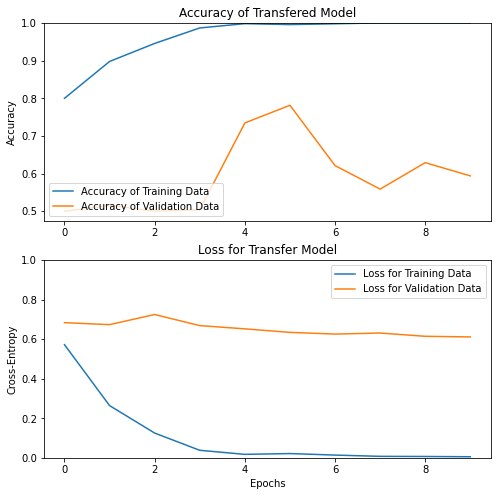

In [25]:
#freese convolutional base
standard_model.trainable = False
#add aditional layers and make a new net
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')
final_model = tf.keras.Sequential([standard_model, global_average_layer,output_layer])

TypeError: int() argument must be a string, a bytes-like object or a number, not 'GlobalAveragePooling2D'

TypeError: 'bool' object is not callable